
<h1 align='center'><b>Predicting Car Selling Prices</b></h1>

------
Dataset is downloaded from : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

------

In [1]:
import pandas as aapd
import matplotlib.pyplot as aaplt
import numpy as aanp
import seaborn as aasns

### **Loading Data**

In [2]:
aadata = aapd.read_csv('car_data.csv')
aadata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
aadata.shape

(301, 9)

In [4]:
aadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
aadata.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


### **Data Cleaning And Visualization**

In [9]:
aadata = aadata.drop('Car_Name', axis=1)
aadata.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# to know how old the car is we subtract current year with the year in which the car was bought
aadata['Years_old'] = 2022 - aadata.Year     
aadata.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
aadata.drop('Year', axis=1, inplace=True)
aadata.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


##### Use One Hot Encoding


In [12]:
aadata = aapd.get_dummies(aadata,drop_first=True)

In [13]:
aadata.head()
# here 'Selling_Price' is what we have to predict

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


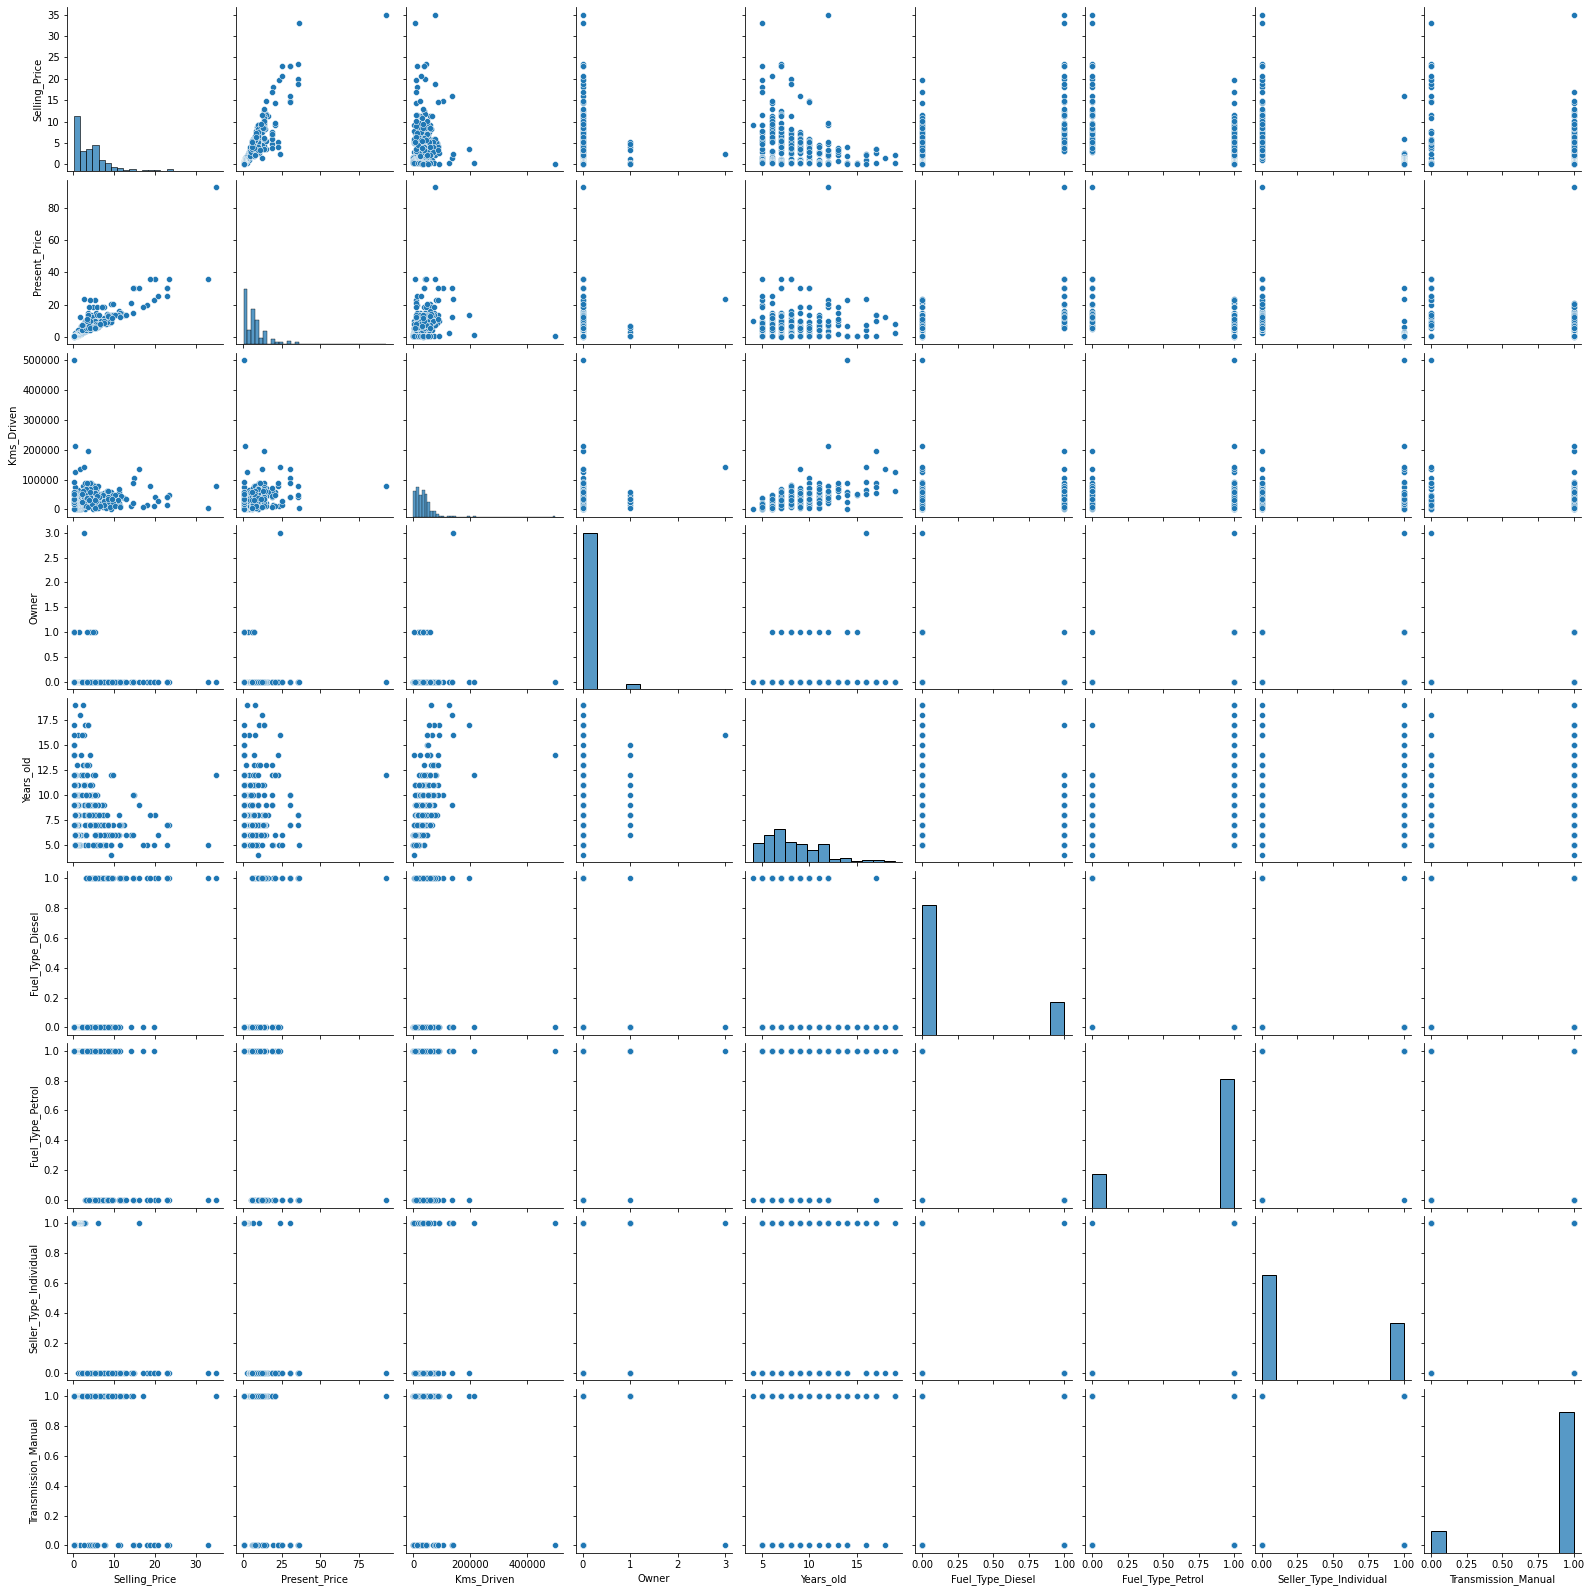

In [14]:
aasns.pairplot(aadata);
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

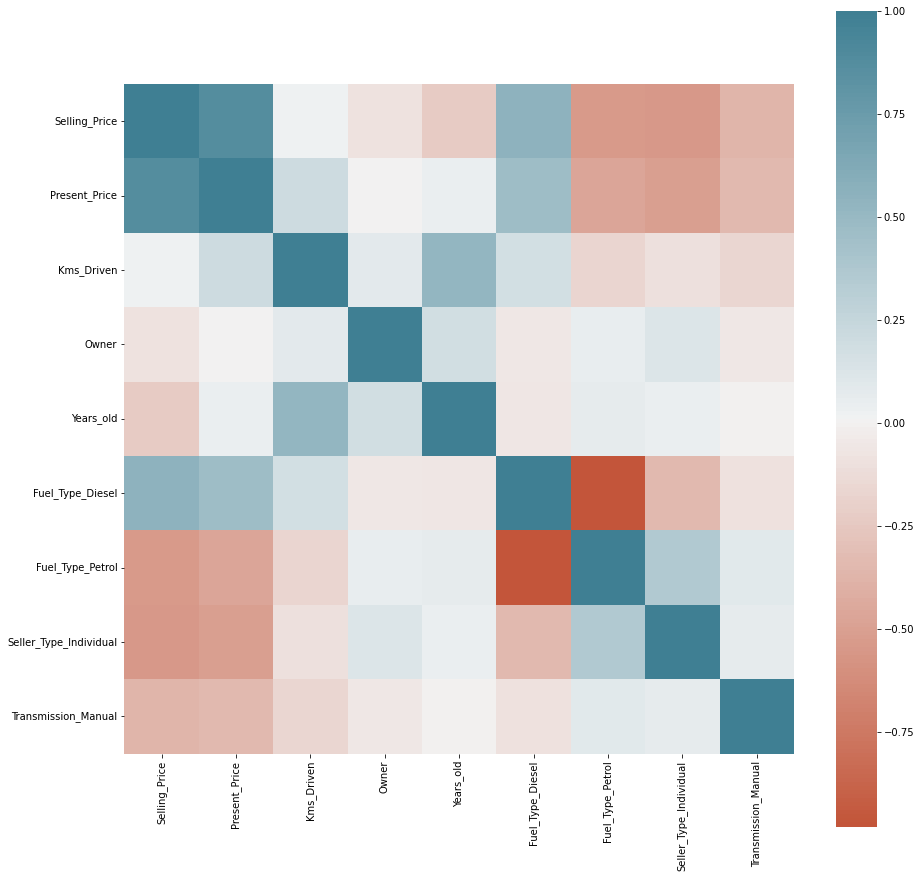

In [15]:
aaplt.figure(figsize=(15,15))
aasns.heatmap(
    aadata.corr(), 
    cmap=aasns.diverging_palette(20, 220, n=200),
    square=True
);

In [13]:
aadata.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
aaX = aadata.drop('Selling_Price', axis = 1)
aay = aadata['Selling_Price']
print(aaX.shape)
print(aay.shape)

(301, 8)
(301,)


##### Cheaking For Important Features!

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
aamodel = ExtraTreesRegressor()
aamodel.fit(aaX,aay)

ExtraTreesRegressor()

In [18]:
aamodel.feature_importances_

array([0.35688622, 0.0401324 , 0.00040194, 0.07625368, 0.24079324,
       0.00771583, 0.13292206, 0.14489463])

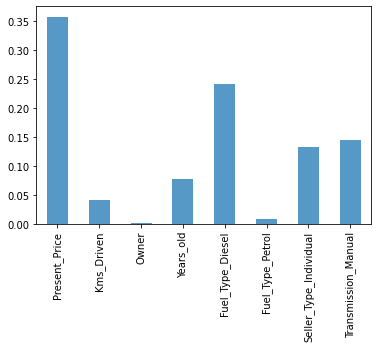

In [19]:
aapd.Series(aamodel.feature_importances_, index=aaX.columns).plot(kind='bar',alpha=0.75, rot=90);

### **Model Training**

In [22]:
from sklearn.model_selection import train_test_split
aaX_train, aaX_test,aay_train, aay_test=train_test_split(aaX,aay,test_size=0.2,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
aamodel = LinearRegression()
aamodel.fit(aaX_train,aay_train)
aamodel.score(aaX_test,aay_test)

0.9144342972228519

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
aacv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [26]:
cross_val_score(LinearRegression(), aaX,aay,cv=aacv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

### Finding best model using RandomizedSearchCV


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [52]:

def aaperfect_model(aaX, aay):
  aamodel_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
  aascore = []
  aacv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for aaalgo_name, aaconfig in aamodel_algo.items():
      aars =  RandomizedSearchCV(aaconfig['model'], aaconfig['params'], cv=aacv, return_train_score=False, n_iter=5)
      aars.fit(aaX_train,aay_train)
      aascore.append({
          'model': aaalgo_name,
          'best_score': aars.best_score_,
          'best_params': aars.best_params_
      })

  aaresult = aapd.DataFrame(score,columns=['model','best_score','best_params'])
  print(aaresult.best_params.tolist())
  return aaresult

In [53]:
aaperfect_model(aaX, aay)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\dell\appdata\local\programs\python\python3

NameError: name 'score' is not defined

In [54]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
final_dec_model.fit(aaX_train,aay_train)
final_dec_model.score(aaX_test,aay_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


0.9395500475784326

In [56]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(aaX_train,aay_train)
final_rf_model.score(aaX_test,aay_test)

0.9535321568260282

In [57]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), aaX,aay,cv=aacv)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolut

array([0.94098549, 0.9240091 , 0.94747035, 0.75532812, 0.90745557])

In [58]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), aaX,aay,cv=aacv)

array([0.9594296 , 0.91236633, 0.96662869, 0.87360696, 0.96121983])

##### **Based on above results we can say that Random Forest Regressor gives the best score.** 

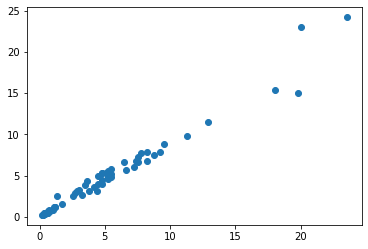

In [52]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

### **Exporting the tested model to a pickle file**

In [59]:
import pickle
with open('RF_price_predicting_model.pkl', 'wb') as aafile:
  # dump information to that file
  pickle.dump(final_rf_model, aafile)